# Predicting heart disease using machine learning

This notebook looks using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from Cleavland data from UCI Machine Learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

1. age - age of the patient in years
2. sex (1 = Male; 0 = Female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spams (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)) anything 130-140 is typically cause for concern
5. chol - serum cholesterol in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs (if fasting blood sugar > 120 mg/dl)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise-induced angina (1 = yes/ 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress or heart stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by fluoroscopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no)(=the predicted attribute)

## Preparing the tools

We're going to use Pandas, Matplotlib and Numpy for data analysis and manipulation.

In [71]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want to our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn import metrics


## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape   # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. What are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# Let's find out how many of each class there are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

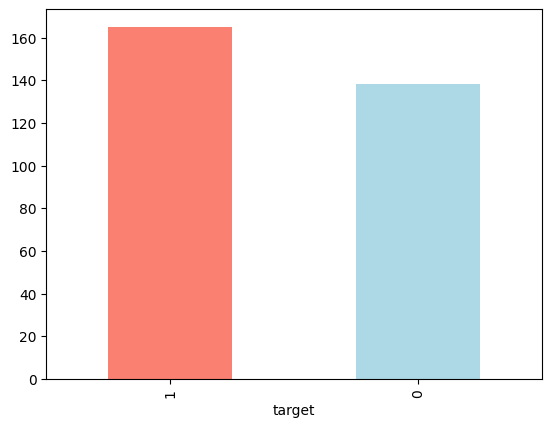

In [13]:
# This is a relatively balanced problem, meaning that we have quite a similar amount of 
# examples in both classes
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df.describe()
# it is going to give us some numercial values (statistics) about our numerical columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
# What we're going to do now is compare different columns to each other. And the reason 
# being here is because this is helpful to help us start gaining an intuition about how
# the features relate to the target variable.
# if you just went to through this row by row, you would start to gain an intuition
# about what values associate with what target value

### Heart Disease Frequency according to Sex

In [19]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [ ]:
# there is a lot mor males (1) than females (0). 
# So we know our data set is a little bit tilted towards having more males than females

In [20]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [22]:
# We can make a simple heuristic: since there are about 100 women
# and 72 out of the entire amount of women (96) have a positive value of heart disease
# being present (target is 1). So we might infer based on this one variable, if the
# participant is a woman, if the sample in our data is a woman, there'd be roughly a 75%
# chance she has heart disease (72 out of 96, so basically 75 out of a 100), based on
# our existing dataset.

# If we look at male, there's about 200 in total with around half indicating the presence 
# of heart disease (93 out of 207, approximately 100 out of 200) When sex=1, when the
# sample is a male, 93 out of 207 indicate that there is heart disease. So if we look at
# this, if the participant is male, we might predict around half the time that participant
# will have heart disease

# And then if we average these out, we'd get 75% plus 50% over 100, you get about 62.5%
# chance that anyone has heart disease, based on our existing data, on the data that we have.
# If we were to see a random patient, based on this comparison alone, we might infer that
# there is 62.5% (about 75% if it's woman and about 50% if it's a male) chance that they
# have heart disease.

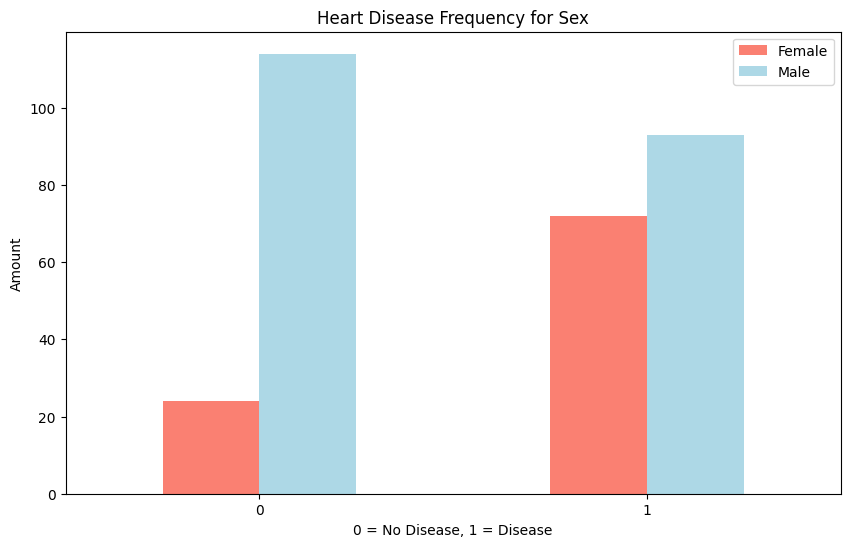

In [31]:
# Creat a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()
# target=0 => not heart disease;    target=1 => heart disease 
# blue is male;    salmon is female

In [10]:
# So we can see (in the bars from the left) that the people who don't have heart disease, 
# there's far more male. And we can see here (bars from the right) that the people who
# do have heart disease, there are more males that do have heart disease.

# But if we look at the ratios compared to each column, if we compare these columns
# we can see that the females who do have heart disease about 3 to 1. So that's where  
# we're getting a three out of four chance (3/4) of a female at random having heart disease

# but males, the ratio is definitely not completely even but it a lot closer than what
# the females are

# Is heart disease more prevalent in woman than in males?

In [ ]:
# Now for our next comparison, what we might do is try to combine a couple of independent variables.
# Look for the variables that I consider to be the most important ones, the ones that stand out, select them and compare them with the target variable
# For example, we can compare Age, Thalach, and Target all in one.

### Age vs. Max Heart Rate for Heart Disease

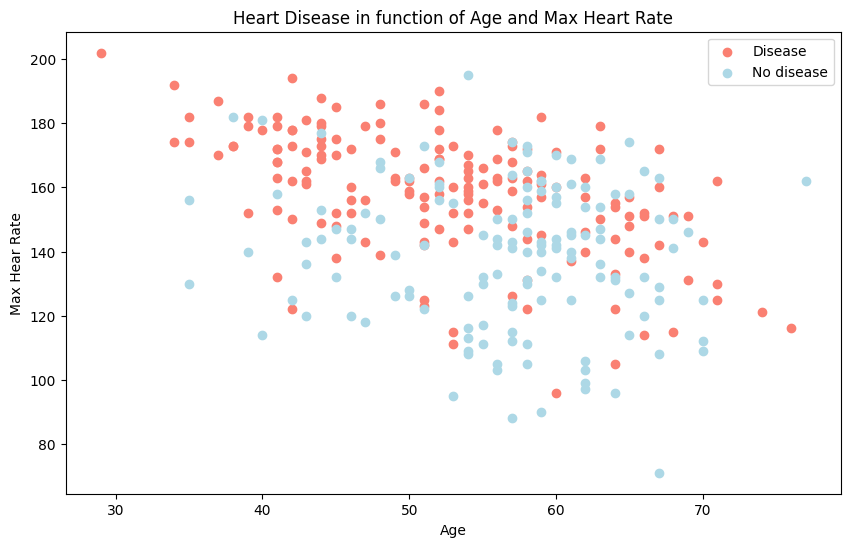

In [6]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],     
            df.thalach[df.target==1],
            c="salmon");     # we're taking the rows of the age column from our df where target is equal to true

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Hear Rate")
plt.legend(["Disease","No disease"]);
plt.show()

In [ ]:
# i can see the pattern going down here.. The younger someone is, the higher their heart rate. that is the trend I see.
# All i can really see is a bit of a downward trend. So as someone gets older, their maximum heart rate decreases. which makes sense
# The declining max heart rate as someone gets older.

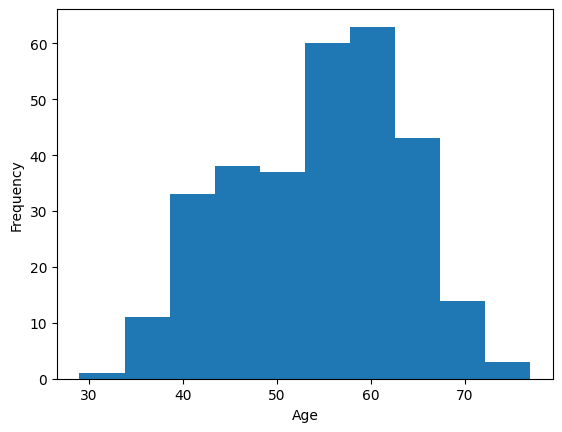

In [8]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();
plt.xlabel("Age")
plt.show()
# to see the spread of the data in terms of age

In [ ]:
# So this kind of distribution is known as a normal distribution. it's very close to the shape of a Bell Curve or Gaussiand Distribution
# but it's kind of swaying towards the ride. So we can see that most of our population or most of our samples, their age is around this big mid gap
# and we don't have that many around the 30 year old age or past 80, we don't have many samples there. The majority of our data set are within
# the 50 to 60 range.

In [ ]:
# does chest pain relate to whether or not someone has heart disease? chest pain versus target column

### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spams (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [9]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [ ]:
# It seems as chest pain goes up, so does whether they have heart disease

# as people have chest pains more often, the number of patients with heart disease increases.

# But If we get zero chest pain, there's a lot more people that don't have heart disease than do
# But if we get cp=2, there's only 18 with zero, so don't have heart disease but 69 so nearly over three times the amount that do have heart disease 

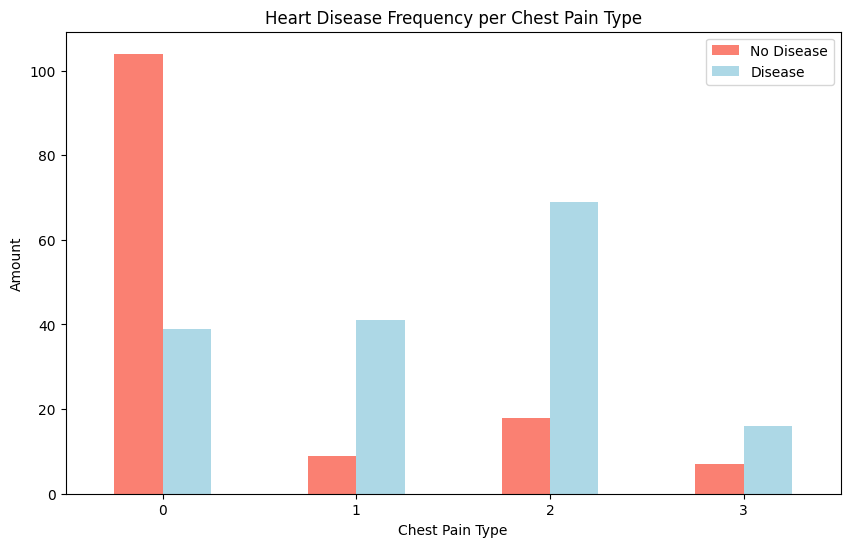

In [13]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])
# Add some communication
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);
plt.show()

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
# Make a correlation matrix
df.corr()
# A correlation matrix is a table showing the relationship between pairs of variables in a data set.
# It is used to identify which variables are related and how strongly they are related, how do the independent variables (features) interact

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
# How it is interpreted
# The values of the correlation matrix range from -1 to 1.
# A value of -1 indicates a perfect negative correlation.
# A value of 1 indicates a perfect positive correlation.
# A value of 0 indicates no correlation.
# A positive correlation means that the variables increase or decrease together.
# A negative correlation means that one variable is increasing while the other is decreasing.

# What it is used for
# To summarise a large dataset.
# To find and show patterns in the data.
# To analyse models using multiple linear regression.
# To study numerical series or series of quantitative values.

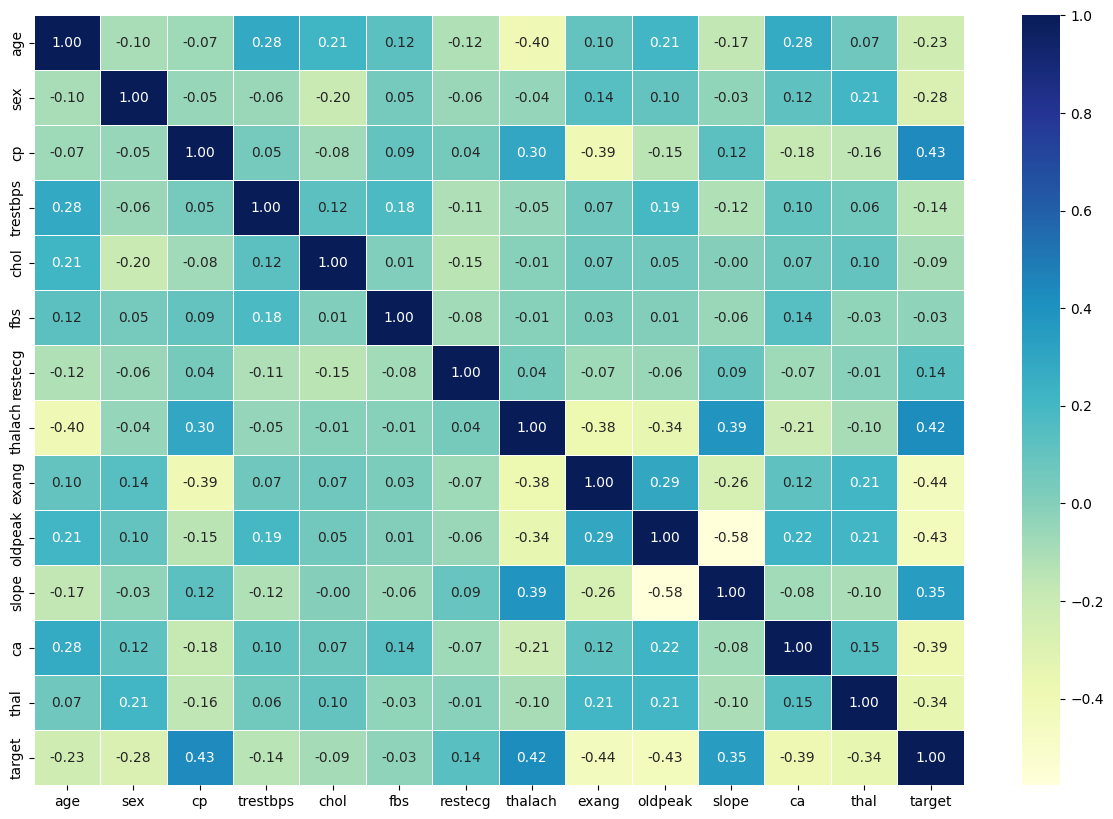

In [19]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
plt.show()

In [21]:
# What this is telling us is: as cp goes up, the target variable also increases (it makes sense to what we have seen in the bar plot)
# because is a positive correlation (0.43)

# as exang decreases, the target variable increases and viceversa, because the variables are negatively correlated.
# if someone gets angina induced by exercise (exang=1), their chance of having heart disease goes down (target=0)

# okay, looking at two variables and going, Is the relationship positive? a.k.a as one increases, so does the other?
# or is the relationship negative? as one decreases, the other increases.

In [20]:
# What we want to do next is model driven EDA, that means we want to build a machine learning model to derive insights of how
# these independent variables in the dataset contribute to the target variable, to predict for the future.

# We are more interested in building a machine learning model that has predictive power based on the data that we have to predict 
# on things in the future.

## 5. Modelling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# So we're going to use the independent variables (features) to try and predict the dependent variable (target)

# Split data into X & y
X = df.drop("target", axis=1)
y= df["target"]

In [11]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
y
# the test set is used to mimic taking our model into a real environment as much as possible.

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

In [14]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [15]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

https://scikit-learn.org/dev/machine_learning_map.html

We're going to try 3 different machin learning models:
1. Logistic Regression (we can use it for classification)
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

https://scikit-learn.org/1.5/modules/linear_model.html#logistic-regression

In [16]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):    
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}    # it's going to set up an empty dictionary
    #Loop through models
    for name, model in models.items(): # we're accessing the items of the dictionary with .items()
        # Fit the model to the data
        model.fit(X_train, y_train)   # So for each model, it's going to fit it to the training data
        # Evaluate the model and append its score to model scores
        model_scores[name] = model.score(X_test, y_test)    # So we're creating a key in the model scores empty dictionary and appending the score
    return model_scores    

In [17]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\Martin\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [33]:
# It returned the scores, how each of our models, without tuning, as the baseline class has performed on finding patterns in our test data.

### Model comparison

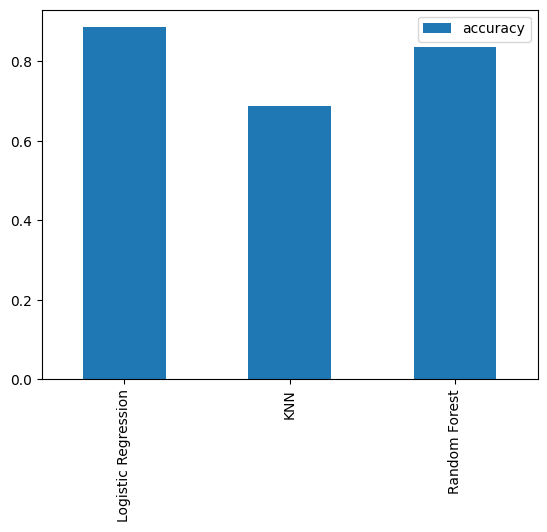

In [18]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();
plt.show()

In [ ]:
# The best algorithm for predicting heart disease is logistic regression

Now we've got a baseline model... and we know a model's first\
predictions aren't always what we should based our next steps off.\
What we should do?

Let's look at the following: because we're a part of the experimental phase. That's what we're going to be working towards.\
We're going to be taking our models that we've got, our baseline models (Logistic Regression (0.88), KNN (0.68), Random Forest(0.83)),\
and we're going to be experimenting with them further, seeing if we can improve them and seeing "does logistic regression perform best\
on accuracy? or could a hyperparameter tuned version of a Random Forest beat it out? or maybe KNN could improve, who knows"

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

(The first two are typical in every ML model, and the rest are typical of every classification problem)

In [5]:
# changing the hyperparameters of a ML model is like changing the settings in my oven (i can select different °T, to turn the fan, etc)
# we are going to tune our ML model so that it performs well on our dataset and performs well on seeing examples

### Hyperparameter tuning (by hand)

In [20]:
# Let's tune KNN (we want to improve the baseline score)

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))
    
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
# https://medium.com/@agrawalsam1997/hyperparameter-tuning-of-knn-classifier-a32f31af25c7


In [21]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [22]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

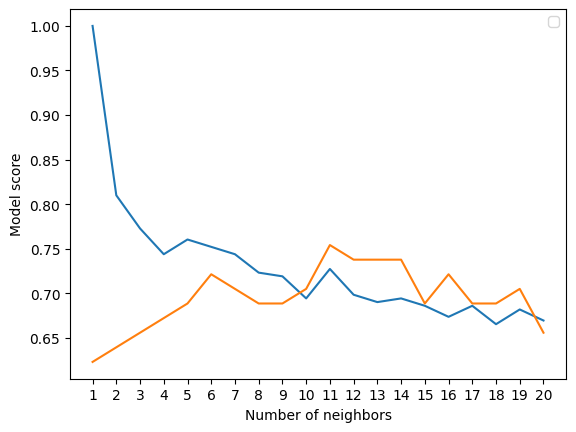

Maximum KNN score on the test data 75.41%


In [30]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend([])
plt.show()

print(f"Maximum KNN score on the test data {max(test_scores)*100:.2f}%")

In [31]:
# A neighbor value of 11 yields the best score on our test data set. So we've just done a little bit of hyperparameter tuning
# and we were able to improve our KNN Classifier results on the test data set by changing it from default (n_neighbors=5), 
# change that to 11 and we get 75.41% of score, versus our inicial result which was 68%.

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()
... using RandomizedSearchCrossValidation

In [ ]:
# Documentation that i can read through: https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
# some references that are useful when tuning a Logistic Regression model with sklearn: https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

In [46]:
# Creatre a hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]} 
# shift tab to see the docstrings, the numpy.logspace() function Returns numbers spaced evenly on a log scale. 
# it is used for creating logarithmically spaced numbers (1e-04 to 1e+04)

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth":[None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
# n_estimators is how many trees we have in our forest
# creates a range of numbers from 10 to 1000 spaced 50 units apart
# it is highly recommended to use continuous distributions for continuous parameters (documentation of RandomizedSearchCV)
# i follow the map to choose the right estimator: https://scikit-learn.org/dev/machine_learning_map.html and then looked for how to tune the RFclassifier

Now we've got hyperparameter grids setup for each of our models,\
let's tune them using RandomizedSearchCV...

In [47]:
# Tune Logistic Regression

np.random.seed(42)

# Setup a random hyperparameter search (rs) for Logistic Regression (log_reg)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [48]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [49]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [7]:
# Set up random seed
np.random.seed(42)

# Set up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_grid,
                           n_iter=20, 
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [8]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [9]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

Experimentation: different ways to tune our hyperparameters
1. by hand
2. RandomizedSearchCV
3. GridSearchCV

## Hyperparameter Tunin with GridSearchCV

Since our LogisticRegression model provides the best scores so far,
we'll try and prove them again using GridSearchCV.
https://scikit-learn.org/1.6/modules/generated/sklearn.model_selection.GridSearchCV.html

In [51]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit our grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [52]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [53]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precion
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [55]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [56]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [59]:
y_test    #y_true  (y_preds son las predicciones y y_test son las etiquetas verdaderas, deberian coincidir, la primera coinciden, la segunda no, etc...)

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

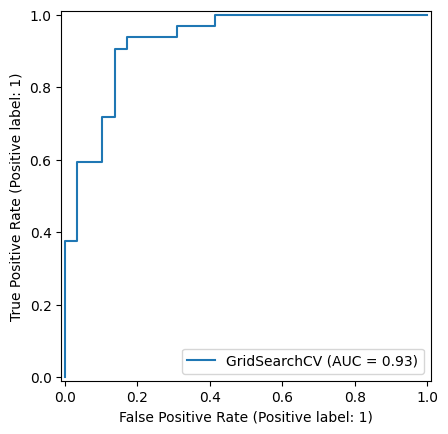

In [76]:
# Receiver operating characteristic (ROC curve).
# The ROC curve is created by plotting the true positive rate against the false positive rate at various settings (as threshold varies)
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

In [77]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


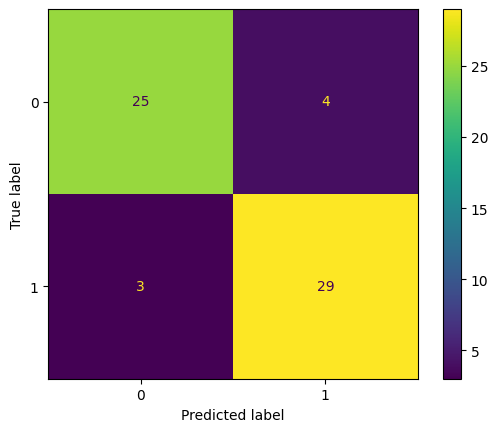

In [78]:
# Create a more visual confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);
plt.grid(False)
plt.show()

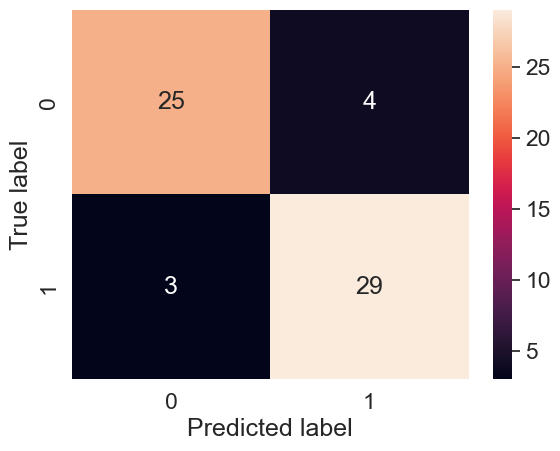

In [85]:
# Set the font scale
sns.set(font_scale=1.5)

# Plot rectangular data as a color-encoded matrix.
conf_mat = confusion_matrix(y_test, y_preds)    # we pass it the test and predictions

# Plot it using seaborn
sns.heatmap(conf_mat,
            annot=True);

plt.xlabel("Predicted label") # predictions go on the x-axis
plt.ylabel("True label") # true labels go on the y-axis 
plt.show()    # if we don't want the bar, cbar=False

Now we've got a ROC curve, an AUC metric (0.93 look at the ROC curve plot) and a confusion matrix, let's get a classification report as well as cross-validated precision\
as well as cross-validated precision, recall and f1-score.

In [87]:
print(classification_report(y_test, y_preds))

# https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model\
using cross-validation and to do so we'll be using `cross_val_score()`

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

we are going to use the `scoring` parameter with different metrics, we're going to change the scoring string

In [88]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [89]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [90]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, 
                         X,
                         y, 
                         cv=5,
                         scoring="accuracy")
cv_acc    # it's evaluating our model over five different splits.. if we take the mean of this, that's going to get the avg accuracy across these 5 != splits

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [93]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [95]:
# Cross-validated precision
cv_precision = np.mean(cross_val_score(clf, 
                         X,
                         y, 
                         cv=5,
                         scoring="precision"))
cv_precision

0.8207936507936507

In [96]:
# Cross-validated recall
cv_recall = np.mean(cross_val_score(clf, 
                         X,
                         y, 
                         cv=5,
                         scoring="recall"))
cv_recall

0.9212121212121213

In [100]:
# Cross-validated f1-score
cv_f1 = np.mean(cross_val_score(clf, 
                         X,
                         y, 
                         cv=5,
                         scoring="f1"))
cv_f1
# control + click para añadir cursores y editar multiples nombres el mismo tiempo. we can functionize repetitive actions! funcionalizar

0.8673007976269721

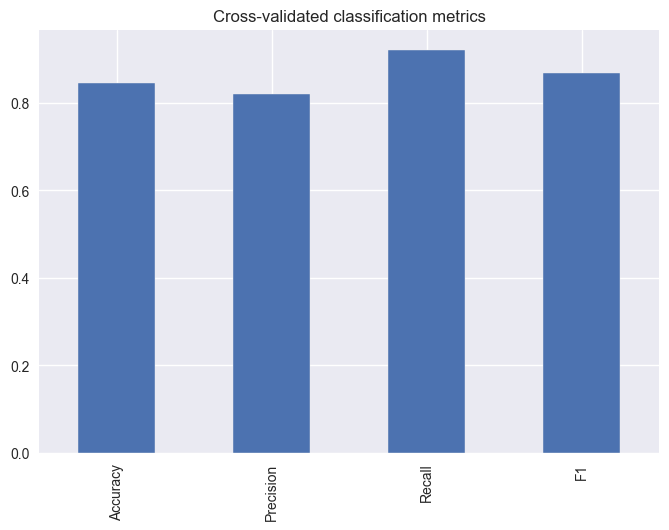

In [111]:
# Visualize cross-validated metrics
plt.style.use('seaborn-v0_8-darkgrid')

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);
plt.show()

In [112]:
# The best metric that our model has it's recall

### Feature importance

Feature importance is another way of asking, "which features contributed\
most to the outcomes of the model and how did they contribute"?

Finding feature importance is different for each machin learning model. 
One way to find feature importance is to search for "(MODEL NAME) feature importance"

https://towardsdatascience.com/a-look-into-feature-importance-in-logistic-regression-models-a4aa970f9b0f do the research

Researching and experimenting.

Let's find feature importance for our Logistic Regression model...

In [113]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [114]:
# which one of these (dependent variables: age, sex, cp, ..., thal) contributes and how do they contribute
# or how much do they contribute to predicting the target?


In [122]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [123]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

In [124]:
# coef_ attribute it gives us the coefficient, the value, or how each parameter (age, sex, cp, ..., thal, independent variables),
# so the X_train data set, the coefficient contributes to our labels target_label.

# We're going to manipulate this coefficient array so that it looks like it make sens

In [125]:
# Match coef's of features to columns
feature_dict =  dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003167280425913024,
 'sex': -0.8604465017405314,
 'cp': 0.6606704375815468,
 'trestbps': -0.011569931400895204,
 'chol': -0.0016637445504085657,
 'fbs': 0.04386110683275644,
 'restecg': 0.3127584216723769,
 'thalach': 0.024593614040407018,
 'exang': -0.6041307979006147,
 'oldpeak': -0.5686280785492623,
 'slope': 0.45051628777983527,
 'ca': -0.6360989513753182,
 'thal': -0.6766337783287578}

In [126]:
# We've mapped all of the different variables in X_train to the right column

# So all we've done is we've taken the coef_ array, which is an attribute of our classifier, and we have taken the columns of
# our data frame (age, sex, cp, ..., thal) and we've mapped them to each other

# So what this is telling us is how much, in what way (pos or neg correlation), how much of this contribute to predicting the target variable.

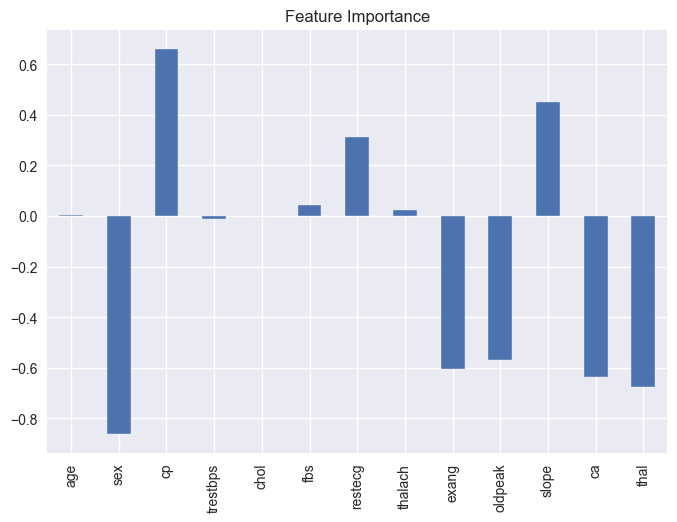

In [127]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);
plt.show()

In [128]:
# So this, in essence, is how much each feature here contributes to predicting the target variable..
# I can see that some of them are negative and some of them are positive

# Sex is negative, that means sex and target variables have negative correlation, when the value for sex increases, the target value (ratio) decreases
# because of the negative coefficient.

In [129]:
# Let's compare
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [130]:
# el coeficiente target disminuye cuando el valor de sexo aumenta.. 
# p. ej, cuando sex=0, el ratio de target es: 72/24 = 3
# y si el valor de sex aumenta sex=1, ahora el ratio de target es: 94/114 = 0.82 (disminuyo, al aumentar el valor de sex, correlacion negativa)

In [131]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

In [133]:
# So it's saying that as slope increases, because it's a positive coefficient, that means that the target should also increase as well.
# .. so as slope increases, slope=0 => 9/12=0.75 (ratio de target)
                        #   slope=1 => 49/91=0.538 (ratio de target)
                        #   slope=2 => 107/35=3.05(ratio de target)
# So as the slope value increases, it means the mode is more likely to predict a higher value of the target. 
# And what's a higher value of the target? because we're predicting with zero or one, a higher value is a one.

# If some of these features offer more value than others, this may change how you collect data for different problems 
# (si vas a recolectar datos vas a recolectar de datos de las variables que te aporten mas significado)..

# So the variables age, trestbps, chol, fbs don't really influence in the value of the target variable.. these are all really low coefficients

# That might influence how you go about collecting data in the future.

# Maybe finding someone's cholesterol level is really hard to do, if it's not contributing much to the model is finding, you migh scrap that
# in the future (despreciar, desestimar)  data collection

# Recolectar datos de las features que esten mas correlacionadas con la variable objetivo

# So if some features are offering far more values than others, you could reduce the number of features your model tries to find patterns in
# as well as improving the variables that have high correlation with target variable.

# I could still achieve the same performance with using the features that offer the most value.

## 6. Experimentation

If you haven't hit your evaluation metric yet (95% accuracy).. ask yourself:

* Could we collect more data?
* Could we try a better model? Like CatBoost or XGBoost? (extra curriculum for you, so you might want to search those two things)
* Could we improve the current models? (beyond what we've done so far)
* If our model is good enogh (i have hit my evaluation metric, how would i export it and share it with others? like we have seen in the Scikit-Learn practice)

Ask questions and start figuring these things out, to start searching, to not be afraid to be wrong. Search on the Documentation, Stackoverflow, Google. 

I can find data sets on the websites of UCI, Kaggle, KDnuggets.